In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Project_datasets/features.csv')

In [3]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [4]:
data = data.dropna(subset=['lag_1', 
                                 'lag_7', 
                                 'rolling_mean_3', 
                                 'lag_2', 
                                 'lag_14', 
                                'lag_month', 
                                'rolling_mean_3',
                                'rolling_std_7',
                                'rolling_max_7',
                                'rolling_mean_7_lag_7',])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 29 to 717
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       535 non-null    object 
 1   day_of_week                535 non-null    int64  
 2   is_weekend                 535 non-null    int64  
 3   day_of_month               535 non-null    int64  
 4   month                      535 non-null    int64  
 5   year                       535 non-null    int64  
 6   is_holiday                 535 non-null    int64  
 7   season                     535 non-null    int64  
 8   lag_1                      535 non-null    float64
 9   lag_2                      535 non-null    float64
 10  lag_7                      535 non-null    float64
 11  lag_14                     535 non-null    float64
 12  lag_month                  535 non-null    float64
 13  lag_year                   343 non-null    float64
 14

In [6]:
bin_edges = [0, 2, 4, 6, float('inf')]
bin_labels = ['low (1–2)', 'mid (3–4)', 'high (5–6)', 'peak (7+)']

In [7]:
data['trip_bin'] = pd.cut(
    data['trip_count'],
    bins=bin_edges,
    labels=bin_labels,
    right=True  # include the right edge in the bin (e.g., 1 is in the '1' bin)
)

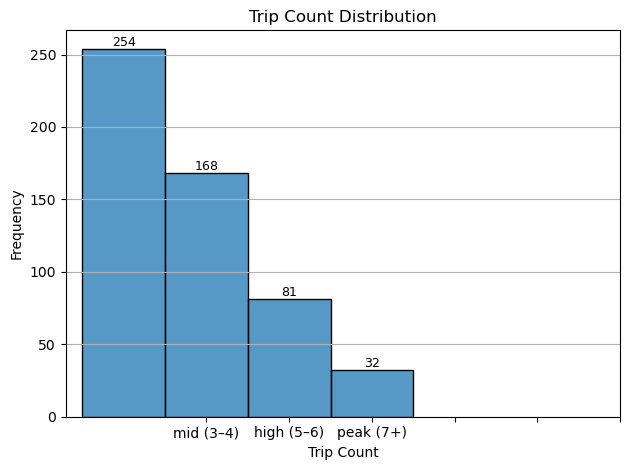

In [9]:
ax = sns.histplot(data['trip_bin'], bins=range(1, 16))

# Add count labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.title('Trip Count Distribution')
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))  # Set x-axis ticks for each trip count
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [84]:
print(data['trip_bin'].value_counts())

trip_bin
low (1–2)     254
mid (3–4)     168
high (5–6)     81
peak (7+)      32
Name: count, dtype: int64


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 29 to 717
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   date                       535 non-null    object  
 1   day_of_week                535 non-null    int64   
 2   is_weekend                 535 non-null    int64   
 3   day_of_month               535 non-null    int64   
 4   month                      535 non-null    int64   
 5   year                       535 non-null    int64   
 6   is_holiday                 535 non-null    int64   
 7   season                     535 non-null    int64   
 8   lag_1                      535 non-null    float64 
 9   lag_2                      535 non-null    float64 
 10  lag_7                      535 non-null    float64 
 11  lag_14                     535 non-null    float64 
 12  lag_month                  535 non-null    float64 
 13  lag_year                   343 non-null

In [10]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Fill only numeric columns with 0
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(0)

# Convert trip_bin to string to avoid Categorical issues
data['trip_bin'] = data['trip_bin'].astype(str)

# Prepare features and labels
X = data.drop(columns=['trip_bin', 'trip_count', 'date'])
y = data['trip_bin']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recombine into balanced dataframe
df_balanced = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.Series(y_resampled, name='trip_bin')
], axis=1)


In [11]:
print(df_balanced['trip_bin'].value_counts())

trip_bin
high (5–6)    254
peak (7+)     254
low (1–2)     254
mid (3–4)     254
Name: count, dtype: int64


In [12]:
df_balanced.to_csv('../Project_datasets/cleaned_bins.csv')

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Set new target size for all classes
target_size = 1000

# Get current class distribution
original_counts = Counter(y)

# Build a custom sampling strategy: each class gets exactly 330 samples
sampling_strategy = {cls: target_size for cls in original_counts}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reconstruct balanced DataFrame
df_balanced = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.Series(y_resampled, name='trip_bin')
], axis=1)

# Verify class distribution
print(df_balanced['trip_bin'].value_counts())


trip_bin
high (5–6)    1000
peak (7+)     1000
low (1–2)     1000
mid (3–4)     1000
Name: count, dtype: int64


In [21]:
df_balanced.to_csv('../Project_datasets/cleaned_bins_big.csv')